In [1]:
import apogee.modelspec.turbospec
import apogee.modelspec.moog
from apogee.modelatm import atlas9
import apogee.spec.plot as splot
from galpy.util import bovy_plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Small differences between Turbospectrum and MOOG when varying individual elements

We change Al and Mg by +/-0.5 dex and look at changes in the Al windows. First we set up the model atmosphere

In [2]:
atm= atlas9.Atlas9Atmosphere(teff=4500.,logg=2.5,metals=0.,am=0.,cm=0.)

We first calculate the baseline, Al +/- 0.5 dex and Mg +/- 0.5 dex for Turbospectrum

In [3]:
turbo_base= apogee.modelspec.turbospec.synth(modelatm=atm,
                                             linelist='turbospec.201312161124',
                                             lsf='all',cont='true',vmacro=0.,
                                             isotopes='arcturus')
turbo_Al= apogee.modelspec.turbospec.synth([13,-0.5,0.5],
                                           modelatm=atm,
                                           linelist='turbospec.201312161124',
                                           lsf='all',cont='true',vmacro=0.,
                                           isotopes='arcturus')
turbo_Mg= apogee.modelspec.turbospec.synth([12,-0.5,0.5],
                                           modelatm=atm,
                                           linelist='turbospec.201312161124',
                                           lsf='all',cont='true',vmacro=0.,
                                           isotopes='arcturus')

Now for MOOG

In [4]:
moog_base= apogee.modelspec.moog.synth(modelatm=atm,
                                        linelist='moog.201312161124.vac',
                                        lsf='all',cont='true',vmacro=0.,
                                        isotopes='arcturus')
moog_Al= apogee.modelspec.moog.synth([13,-0.5,0.5],
                                      modelatm=atm,
                                      linelist='moog.201312161124.vac',
                                      lsf='all',cont='true',vmacro=0.,
                                      isotopes='arcturus')
moog_Mg= apogee.modelspec.moog.synth([12,-0.5,0.5],
                                      modelatm=atm,
                                      linelist='moog.201312161124.vac',
                                      lsf='all',cont='true',vmacro=0.,
                                      isotopes='arcturus')

Now we plot

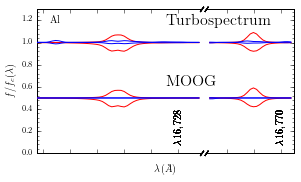

In [6]:
splot.windows(1.+turbo_Al[1]-turbo_base[0],'Al',yrange=[0.,1.3],color='r')
splot.windows(1.+turbo_Al[0]-turbo_base[0],'Al',color='r',overplot=True)
splot.windows(1.+turbo_Mg[1]-turbo_base[0],'Al',color='b',overplot=True)
splot.windows(1.+turbo_Mg[0]-turbo_base[0],'Al',color='b',overplot=True)
splot.windows(0.5+moog_Al[1]-moog_base[0],'Al',color='r',overplot=True)
splot.windows(0.5+moog_Al[0]-moog_base[0],'Al',color='r',overplot=True)
splot.windows(0.5+moog_Mg[1]-moog_base[0],'Al',color='b',overplot=True)
splot.windows(0.5+moog_Mg[0]-moog_base[0],'Al',color='b',overplot=True)
bovy_plot.bovy_text(0.5,1.15,r'$\mathrm{Turbospectrum}$',size=16.)
bovy_plot.bovy_text(0.5,0.6,r'$\mathrm{MOOG}$',size=16.)